In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

# library to detect gender with a name
import gender_guesser.detector as gender

# regex
import re

#For plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import norm
sns.set()

In [2]:
from datetime import datetime,timedelta


In [3]:
bookings_SIS = pd.read_csv('Data\SIS_bookings_1102.csv')
bookings_SOB = pd.read_csv('Data\LKCSB_bookings_1102.csv')
bookings_SOA = pd.read_csv('Data\SOA_bookings_1102.csv')
bookings_SOE = pd.read_csv('Data\SOE_bookings_1102.csv')
bookings_SOL = pd.read_csv('Data\SOL_bookings_1102.csv')
bookings = pd.concat([bookings_SIS,bookings_SOB,bookings_SOA,bookings_SOE,bookings_SOL])

In [4]:
bookings

,Unnamed: 0,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00-21:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
1,1,"11 February 2020, Tuesday",SIS GSR 2-2,11:30-15:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting
2,2,"11 February 2020, Tuesday",SIS GSR 2-2,15:30-19:30,Confirmed,BK-20200203-001315,"CHUA ZHI NING, CHARLOTTE",Student,znchua.2019@sis.smu.edu.sg,AdHoc,study
3,3,"11 February 2020, Tuesday",SIS GSR 2-3,12:00-15:00,Confirmed,BK-20200129-001198,LIM JIA WEN,Student,jiawen.lim.2018@business.smu.edu.sg,AdHoc,study
4,4,"11 February 2020, Tuesday",SIS GSR 2-3,15:00-17:00,Confirmed,BK-20200210-001217,"LEK JAN YEE, LOIS",Student,lois.lek.2018@sis.smu.edu.sg,AdHoc,Meeting
...,...,...,...,...,...,...,...,...,...,...,...
674,674,"29 January 2020, Wednesday",SOL-B1.11-GS,16:00-17:00,Confirmed,BK-20200128-000154,NATALIE SHAUNA TAN,Student,natalietan.2019@business.smu.edu.sg,Academic,Meeting
675,675,"29 January 2020, Wednesday",SOL-B1.11-GS,17:00-18:30,Confirmed,BK-20200127-000085,"CHENG SIN HUI, CHELSEA",Student,shcheng.2017@socsc.smu.edu.sg,AdHoc,meeting
676,676,"29 January 2020, Wednesday",SOL-B1.11-GS,18:30-21:30,Confirmed,BK-20200128-001211,MOHAMED SHAFIE BIN ALLAMEEN,Student,mohamedsa.2017@law.smu.edu.sg,AdHoc,meeting
677,677,"29 January 2020, Wednesday",SOL-B1.12-GS,12:00-16:00,Confirmed,BK-20200115-000789,DARRYL HOR JUN HENG,Student,darryl.hor.2018@law.smu.edu.sg,AdHoc,study


In [5]:
bookings.count()

Unnamed: 0                       5308
Day                              5308
Facility                         5308
Booking Time                     5308
Booking Status                   5308
Booking Reference Number         5308
Booked for User Name             5308
Booked for User Org Unit         5308
Booked for User Email Address    5308
Use Type                         5308
Purpose of Booking               5308
dtype: int64

In [6]:
bookings = bookings.drop(columns='Unnamed: 0')
# bookings = bookings.drop(bookings.index[0])
# bookings = bookings.rename(columns={'0' : 'Day', '1': 'Facility', '2':'Booking Time', '3': 'Purpose'})

In [7]:
bookings['Facility'].unique()

array(['SIS GSR 2-1', 'SIS GSR 2-2', 'SIS GSR 2-3', 'SIS GSR 2-4',
       'SIS GSR 2-5', 'SIS GSR 2-6', 'SIS GSR 2-7', 'SIS GSR 3-1',
       'SIS GSR 3-2', 'SIS GSR 3-3', 'SIS GSR 3-4', 'SIS GSR 3-5',
       'SIS GSR 3-6', 'LKCSB GSR 1-1', 'LKCSB GSR 1-2', 'LKCSB GSR 2-1',
       'LKCSB GSR 2-10', 'LKCSB GSR 2-11', 'LKCSB GSR 2-12',
       'LKCSB GSR 2-13', 'LKCSB GSR 2-14', 'LKCSB GSR 2-15',
       'LKCSB GSR 2-16', 'LKCSB GSR 2-17', 'LKCSB GSR 2-18',
       'LKCSB GSR 2-19', 'LKCSB GSR 2-2', 'LKCSB GSR 2-20',
       'LKCSB GSR 2-21', 'LKCSB GSR 2-22', 'LKCSB GSR 2-23',
       'LKCSB GSR 2-24', 'LKCSB GSR 2-25', 'LKCSB GSR 2-3',
       'LKCSB GSR 2-4', 'LKCSB GSR 2-5', 'LKCSB GSR 2-6', 'LKCSB GSR 2-7',
       'LKCSB GSR 2-8', 'LKCSB GSR 2-9', 'LKCSB GSR 3-1',
       'LKCSB GSR 3-11', 'LKCSB GSR 3-12', 'LKCSB GSR 3-13',
       'LKCSB GSR 3-14', 'LKCSB GSR 3-15', 'LKCSB GSR 3-16',
       'LKCSB GSR 3-17', 'LKCSB GSR 3-18', 'LKCSB GSR 3-19',
       'LKCSB GSR 3-2', 'LKCSB GSR 3-20', 'LKC

In [8]:
bookings['Booking Time'].unique()

array(['19:00-21:00', '11:30-15:30', '15:30-19:30', '12:00-15:00',
       '15:00-17:00', '17:00-21:00', '09:00-12:00', '15:30-18:30',
       '10:00-14:00', '14:00-18:00', '18:00-22:00', '10:00-12:00',
       '12:00-14:00', '12:00-16:00', '16:00-20:00', '08:30-11:30',
       '11:00-14:00', '14:00-17:00', '17:00-20:00', '09:30-12:00',
       '20:00-22:30', '11:00-12:00', '15:30-19:00', '11:30-15:00',
       '15:00-19:00', '19:00-22:30', '16:30-20:00', '12:00-15:30',
       '15:30-17:00', '16:00-18:30', '18:30-22:00', '08:30-12:00',
       '15:00-18:00', '13:00-17:00', '11:00-15:00', '10:00-13:00',
       '14:30-17:00', '09:30-13:00', '13:00-16:00', '10:30-14:30',
       '09:00-13:00', '09:00-12:30', '12:00-13:00', '18:00-21:30',
       '10:30-11:30', '12:30-13:30', '14:00-15:00', '15:30-16:30',
       '16:30-18:00', '08:30-12:30', '12:30-16:30', '16:30-18:30',
       '19:30-22:00', '16:00-19:00', '19:00-22:00', '11:30-14:00',
       '15:00-17:30', '19:00-21:30', '08:30-10:00', '12:00-13:

In [9]:
def get_half_hr_iterations(time_range):
    """
    Given string of booking time-range eg '1030-1200', return the number of 30minutes interval 
    between them eg ['0800-1030', '1200-1400','1630-2230']
    
    hold_start_and_end_timings -> list of start and end timings
    
    time_object_1 & time_object_2 -> converts the start and end timings to datetime.time objects
    whether the day is a weekday or not. 8am to 1030pm
    
    start_booking_time_mins & end_booking_time_mins -> Convert the booking timings into minutes for calculation
    of the number of 30 minutes interval. e.g. 240 minutes -> 4 hours -> 8 thirty minute intervals

    """
    hold_start_and_end_timings = time_range.split('-')
    time_object_1 = datetime.strptime(hold_start_and_end_timings[0],'%H:%M').time()
    time_object_2 = datetime.strptime(hold_start_and_end_timings[1],'%H:%M').time()
    h1, m1, s1 = time_object_1.hour, time_object_1.minute, time_object_1.second
    h2, m2, s2 = time_object_2.hour, time_object_2.minute, time_object_2.second
    
    start_booking_time_mins = (m1 + 60*h1) 
    end_booking_time_mins = (m2 + 60*h2)
    
    return int((end_booking_time_mins - start_booking_time_mins)/60/0.5)


print(get_half_hr_iterations('08:30-12:30'))

# bookings['Booking Time'].apply(get_half_hr_iterations())

8


In [10]:
def expand_df_based_on_intervals(bookings):
    """
    Given a dataframe containing bookings in time-ranges e.g. 08:30-09:30, 
    returns a new dataframe after expanding the timing into 
    30 minutes interval -> 08:30, 09:00, 09:30. 
    This is done for every row of facility booking.
    
    new_bookings -> new pandas DataFrame to hold the expanded time-ranges based on 30 minutes interval. 
    To be returned at the end.
    
    num_iter -> Given string of booking time-range eg '1030-1200', return the number of 30 minutes interval 
    between them eg ['0800-1030', '1200-1400','1630-2230']
    
    hold_time -> String which holds the starttime after splitting the time-range by '-'. e.g. '08:30-10:30 -> 08:30'
    """

    new_bookings = pd.DataFrame(columns=['Day','Facility','Booking Time','Booking Status', 'Booking Reference Number', 
                                         'Booked for User Name', 'Booked for User Org Unit', 'Booked for User Email Address',
                                        'Use Type', 'Purpose of Booking']) #new df to hold the intervals

    for index,columns in bookings.iterrows():
        num_iter = get_half_hr_iterations(columns['Booking Time']) #generates 30 minutes interval
        hold_time = columns['Booking Time'].split('-')
        hold_time = hold_time[0]

        for i in range(num_iter):
            #add a new row of record into the new df
            new_bookings.loc[len(new_bookings)] = [columns['Day'], columns['Facility'], hold_time, columns['Booking Status'],
                                                  columns['Booking Reference Number'],columns['Booked for User Name'],
                                                   columns['Booked for User Org Unit'],columns['Booked for User Email Address'],
                                                  columns['Use Type'],columns['Purpose of Booking']] 
            
            #add 30 minutes to the previous timing added into the new df
            hold_time = datetime.strptime(hold_time,'%H:%M')+ timedelta(minutes=30) 
            
            #the hold_time variable is now a datetime object because timedelta cannot be used on datetime.time() objects
            #so, we convert it back to timings as we do not need the date
            hold_time = hold_time.strftime("%H:%M")
            
    return new_bookings

expanded_bookings = expand_df_based_on_intervals(bookings)

In [11]:
expanded_bookings.head()

,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
1,"11 February 2020, Tuesday",SIS GSR 2-1,19:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
2,"11 February 2020, Tuesday",SIS GSR 2-1,20:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
3,"11 February 2020, Tuesday",SIS GSR 2-1,20:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
4,"11 February 2020, Tuesday",SIS GSR 2-2,11:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting


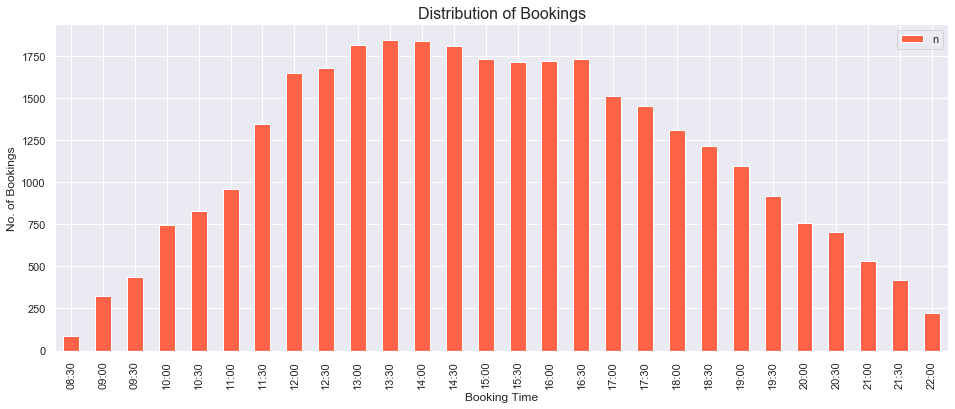

In [12]:
bookings_time = expanded_bookings.groupby('Booking Time').size().reset_index(name='n')

fig, ax = plt.subplots()
bookings_time.plot(kind='bar', x='Booking Time', y='n', ax=ax, figsize=(16, 6), color='tomato',)
ax.set_ylabel("No. of Bookings")
ax.set_xlabel("Booking Time")
plt.title("Distribution of Bookings", fontsize=16)
plt.show()

In [13]:
#plot timings based on how many rows for each timing

#relationship between the school booker is from vs the school which booker booked in

#forecasting(?????)

#do analysis with SR vs without SR to see differences/trends


#pd.grouper() to groupby weeks, frequency = w

In [14]:
#to determine the popular booking timing
popular_bookings_time = expanded_bookings.groupby('Booking Time').size()
popular_bookings_time

Booking Time
08:30      86
09:00     326
09:30     437
10:00     747
10:30     828
11:00     962
11:30    1344
12:00    1651
12:30    1681
13:00    1816
13:30    1845
14:00    1838
14:30    1807
15:00    1732
15:30    1715
16:00    1721
16:30    1729
17:00    1511
17:30    1450
18:00    1312
18:30    1215
19:00    1099
19:30     915
20:00     757
20:30     702
21:00     533
21:30     417
22:00     223
dtype: int64

In [15]:
#popular facilities/GSR from the schools
def popular_facilities_each_school(booking_df):
    """
    Given a dataframe containing bookings, 
    returns a new dataframe of facilities by school,
    sorted from most popular to least popular.
    
    sch_dict -> nested dictionary to hold the count of booking for
    each facility in each school e.g. {LKCSB: {LKCSB GSR 1-1:200}}
    
    
    booking_groupby_facility -> stores a groupby of the input dataframe, according to facilities)
    
    """
    sch_dict = {'LKCSB':{},'SIS':{},'SOA':{},'SOL':{},'SOE':{}}
    booking_groupby_facility = booking_df.groupby('Facility').size().reset_index(name='Count')
        
    for index,columns in booking_groupby_facility.iterrows():
        if 'LKCSB' in columns['Facility']:
            sch_dict['LKCSB'][columns['Facility']] = columns['Count']
            
        elif 'SIS' in columns['Facility']:
            sch_dict['SIS'][columns['Facility']] = columns['Count']
            
        elif 'SOA' in columns['Facility']:
            sch_dict['SOA'][columns['Facility']] = columns['Count']
            
        elif 'SOL' in columns['Facility']:
            sch_dict['SOL'][columns['Facility']] = columns['Count']
            
        elif 'SOE' in columns['Facility']:
            sch_dict['SOE'][columns['Facility']] = columns['Count']

    return pd.DataFrame(sch_dict)['SOE'].dropna().sort_values(ascending=False)

popular_facilities_each_school(expanded_bookings) #testing the function
#use case of this function: 
#combine  with availability of facility function to determine the best rooms to book that are available

SOE/SOSS GSR 3-13    253.0
SOE/SOSS GSR 3-18    251.0
SOE/SOSS GSR 3-16    248.0
SOE/SOSS GSR 2-7     248.0
SOE/SOSS GSR 4-6     247.0
SOE/SOSS GSR 3-2     246.0
SOE/SOSS GSR 3-6     242.0
SOE/SOSS GSR 4-9     241.0
SOE/SOSS GSR 2-10    240.0
SOE/SOSS GSR 2-11    238.0
SOE/SOSS GSR 2-12    235.0
SOE/SOSS GSR 2-13    233.0
SOE/SOSS GSR 4-10    232.0
SOE/SOSS GSR 3-14    231.0
SOE/SOSS GSR 2-2     230.0
SOE/SOSS GSR 2-3     226.0
SOE/SOSS GSR 2-6     226.0
SOE/SOSS GSR 2-14    224.0
SOE/SOSS GSR 2-1     224.0
SOE/SOSS GSR 3-15    223.0
SOE/SOSS GSR 3-1     223.0
SOE/SOSS GSR 3-8     222.0
SOE/SOSS GSR 3-12    222.0
SOE/SOSS GSR 3-10    221.0
SOE/SOSS GSR 3-9     221.0
SOE/SOSS GSR 2-17    219.0
SOE/SOSS GSR 4-8     215.0
SOE/SOSS GSR 2-4     215.0
SOE/SOSS GSR 2-8     215.0
SOE/SOSS GSR 2-15    213.0
SOE/SOSS GSR 3-5     212.0
SOE/SOSS GSR 2-5     211.0
SOE/SOSS GSR 3-17    211.0
SOE/SOSS GSR 4-4     209.0
SOE/SOSS GSR 3-4     206.0
SOE/SOSS GSR 2-16    206.0
SOE/SOSS GSR 3-11    202.0
S

In [16]:
# clustering model (unsupervised) --> based on frequency and duration of their booking. 
#Can analyse clusters to find out what sch they are from and rough timings they booked

"""
recreate a new df of only 2 columns.

frequency -> count the no. of times they booked (need to use original df)
duration of their booking --> use expanded

iterate through SSE and see if the drop in SSE is significant or not. Can use this to gauge the optimal k


"""
# number_of_bookings_per_user is a dictionary to store number of bookings per user:
number_of_bookings_per_user = {}
name = []
num_bookings = []

for row in bookings['Booked for User Name']:
    if row not in number_of_bookings_per_user:
        number_of_bookings_per_user[row] = [1]
    else:
        number_of_bookings_per_user[row][0]+=1
        
for key in number_of_bookings_per_user:
    name.append(key)
    num_bookings.append(number_of_bookings_per_user[key][0])

number_bookings_df = pd.DataFrame({'Name':name, 'No. of Bookings':num_bookings})
number_bookings_df

#new is a dictionary which stores the total duration a user has booked, in minutes
new = {}
name=[]
duration_of_bookings = []
for row in expanded_bookings['Booked for User Name']:
    if row not in new:
        new[row] = [30]
    else:
        new[row][0]+=30

for key in new:
    name.append(key)
    duration_of_bookings.append(new[key][0])


duration_bookings_df = pd.DataFrame({'Name':name,'Duration of Bookings':duration_of_bookings})
duration_bookings_df


#merge the 2 dataframe
df_merge_col = pd.merge(number_bookings_df, duration_bookings_df, on='Name')
df_merge_col


,Name,No. of Bookings,Duration of Bookings
0,WEE XI HWEE,3,420
1,"LOW HUI FONG, IRIS",1,240
2,"CHUA ZHI NING, CHARLOTTE",6,1410
3,LIM JIA WEN,3,540
4,"LEK JAN YEE, LOIS",1,120
...,...,...,...
2502,LOW BAO ER,1,240
2503,GOI JIA JIAN,1,150
2504,RIVALDI KONGRES,1,180
2505,ZHANG YUYING,1,120


In [73]:
#plot the SSEs and determine optimal k
df_merge_col_name_dropped = df_merge_col.drop(['Name'],axis=1)

def add_one(col):
    return col+1
df_merge_col_name_dropped_add_one = np.log(df_merge_col_name_dropped['No. of Bookings'].apply(add_one)).reset_index()
df_merge_col_name_dropped_add_one['Duration of Bookings'] = df_merge_col_name_dropped['Duration of Bookings'].apply(np.log)

# sns.boxplot(df_merge_col_name_dropped_add_one)
# sns.boxplot(np.log(df_merge_col_name_dropped['Duration of Bookings']))

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [77]:
df_merge_col_name_dropped_add_one.drop(columns = 'index',inplace=True)

In [78]:
df_merge_col_name_dropped_add_one.head()

,No. of Bookings,Duration of Bookings
0,1.386294,6.040255
1,0.693147,5.480639
2,1.945910,7.251345
3,1.386294,6.291569
4,0.693147,4.787492


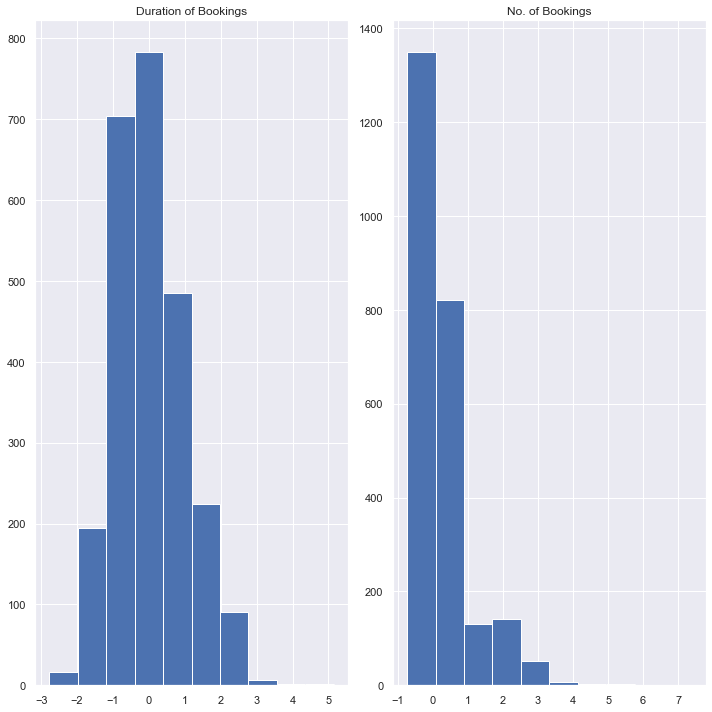

In [88]:
# Solution
scaler = StandardScaler()
scaler.fit(df_merge_col_name_dropped_add_one) 
df_merge_col_name_dropped_scaled = scaler.transform(df_merge_col_name_dropped_add_one)

df_merged_prepared = pd.DataFrame(df_merge_col_name_dropped_scaled, columns=df_merge_col_name_dropped_add_one.columns)

df_merged_prepared

df_merged_prepared.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [89]:
#determine SSE

SSE = []

for i in range(1,8):
    model5 = KMeans(n_clusters = i)
    model5.fit(df_merged_prepared)
    SSE.append(model5.inertia_)
print(SSE)



[5013.999999999999, 1861.9853419135447, 921.6227690243459, 675.0799412873276, 434.9087233513045, 357.9456598733524, 290.4547040704109]


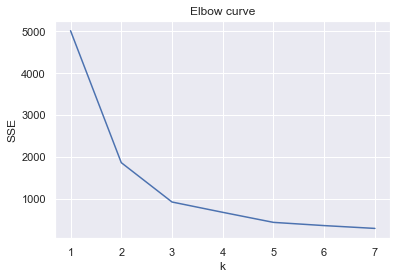

In [90]:
# Plot the elbow curve


k = (range(1,8))
plt.plot(k, SSE)

plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [91]:
#perform clustering with k = 5
model = KMeans(n_clusters = 3,random_state=99)
model.fit(df_merged_prepared)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [95]:
# print the attributes inertia_, n_iter, cluster_centers_ of the obtianed model

print("Attributes of the clustering solution for k=3:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

Attributes of the clustering solution for k=3:
SSE : 921.6
Num of iterations : 8

Cluster centers : [[-0.71692187 -0.70909061]
 [ 0.40223386  0.49832983]
 [ 2.04445936  1.77043578]]


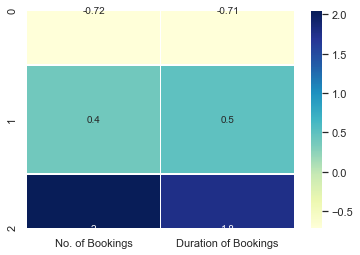

In [94]:
clust_means = pd.DataFrame(model.cluster_centers_, columns=df_merge_col_name_dropped.columns)
sns.heatmap(clust_means,  linewidths=.5, cmap="YlGnBu",annot=True)


## Yan Rui's function
### - Function predicts gender of the booker using their name

In [26]:
# bookings['Gender Predict'] = bookings['Booked for User Name'].apply(lambda x: _get_gender(x))